### Impact Social Media on Mental Health

This project pulls a dataset from Kaggle, whos purpose is to determine whether or not a person should seek professional help regarding their mental health. To remain within the scope of the class, I will train an Adaboost model in order to predict a persons need for professional help. Furthermore, this project intends to explore the need based on age as well. Recent studies have suggested a major correlation between mental health issues in childrean and social media use. The project will also further explore what specific social media platforms contribute the most, if any such case exists. Formal mental health disorder diagnoses are not included in the data. The goal is to predict wether intervention and professional help are needed in order to properly diagnose and prevent mental health crisis. The model will classify as a yes (1) or no (0), if the person needs professional help. Additional classifying results are not needed, for example a "maybe", due to the nature of the subject. Middlegrounds and other classifications also suggest need for seeking professional help as a preventive measure, even if not required afterall. Additionally, due to that aspect a high false positive will not be seen as intrinsically harmful. This is assuming that seeking professional help regarding your mental health when not needed is not harmful, or at least the harm is a negligible number -  there is no prominent evidence that suggests otherwise. 

Articles exemplifying examples of mental health concerns particulary in children are referenced below: 

Surgeon General Warns that Social Media May Harm Children and Adolescents:
https://www.nytimes.com/2023/05/23/health/surgeon-general-social-media-mental-health.html?campaign_id=2&emc=edit_th_20230524&instance_id=93337&nl=todaysheadlines&regi_id=17754076&segment_id=133753&user_id=16ecf3987642ea9959b524420f653d1e

Instagram Makes Teen Girls Hate Themselves. Is That a Bug or  Feature?:
https://time.com/6098771/instagram-body-image-teen-girls/?utm_medium=email&utm_source=sfmc&utm_campaign=newsletter+brief+default+ac&utm_content=+++20210918+++body&et_rid=31875398

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt 
%matplotlib inline 

In [2]:
df = pd.read_csv("smmh.csv")

In [3]:
df.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,...,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,...,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,...,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,...,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,...,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,...,4,4,5,5,3,3,3,4,4,1


In [4]:
df.shape

(481, 21)

In [5]:
df.isnull().sum()

Timestamp                                                                                                                0
1. What is your age?                                                                                                     0
2. Gender                                                                                                                0
3. Relationship Status                                                                                                   0
4. Occupation Status                                                                                                     0
5. What type of organizations are you affiliated with?                                                                  30
6. Do you use social media?                                                                                              0
7. What social media platforms do you commonly use?                                                                      0
8. What is the a

In [6]:
df = df.drop(df.columns[[0,5]], axis = 1)

In [7]:
df.isnull().sum()

1. What is your age?                                                                                                    0
2. Gender                                                                                                               0
3. Relationship Status                                                                                                  0
4. Occupation Status                                                                                                    0
6. Do you use social media?                                                                                             0
7. What social media platforms do you commonly use?                                                                     0
8. What is the average time you spend on social media every day?                                                        0
9. How often do you find yourself using Social media without a specific purpose?                                        0
10. How often do you get

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                --------------  -----  
 0   1. What is your age?                                                                                                  481 non-null    float64
 1   2. Gender                                                                                                             481 non-null    object 
 2   3. Relationship Status                                                                                                481 non-null    object 
 3   4. Occupation Status                                                                                                  481 non-null    object 
 4   6. Do yo

In [9]:
social_media_platforms = df[df.columns[5]].apply(lambda x: [item.strip() for item in x.split(',')]).explode().unique()
ages = df[df.columns[0]].unique()

print("List of social media platforms used:", social_media_platforms)
print("list of ages:", ages)

List of social media platforms used: ['Facebook' 'Twitter' 'Instagram' 'YouTube' 'Discord' 'Reddit' 'Pinterest'
 'TikTok' 'Snapchat']
list of ages: [21.  22.  20.  24.  23.  25.  28.  34.  26.  35.  18.  19.  56.  65.
 17.  40.  33.  55.  27.  14.  38.  32.  30.  16.  48.  47.  50.  49.
 51.  46.  36.  37.  45.  42.  31.  69.  91.  15.  29.  43.  26.7 52.
 44.  60.  13.  53. ]


In [10]:
# label by age group to simplify

# Assuming your DataFrame is named df and the age column is 'Age'
df['Age_Group'] = pd.cut(df['1. What is your age?'].astype(float), 
                            bins=[10, 19, 30, 45, 60, 100],  # Adjust the bins as needed
                            labels=['10-19', '20-30', '30-45', '46-60', '60+'])

df = df.drop(columns = '1. What is your age?')

In [11]:
df['Age_Group'].value_counts()

Age_Group
20-30    341
10-19     51
46-60     48
30-45     38
60+        3
Name: count, dtype: int64

### What is the target variable? EDA to determine

Because there is no concrete label that determines whether or not a person needs to seek professional help, I am going to do some EDA to determine what may work as the best predictor. 

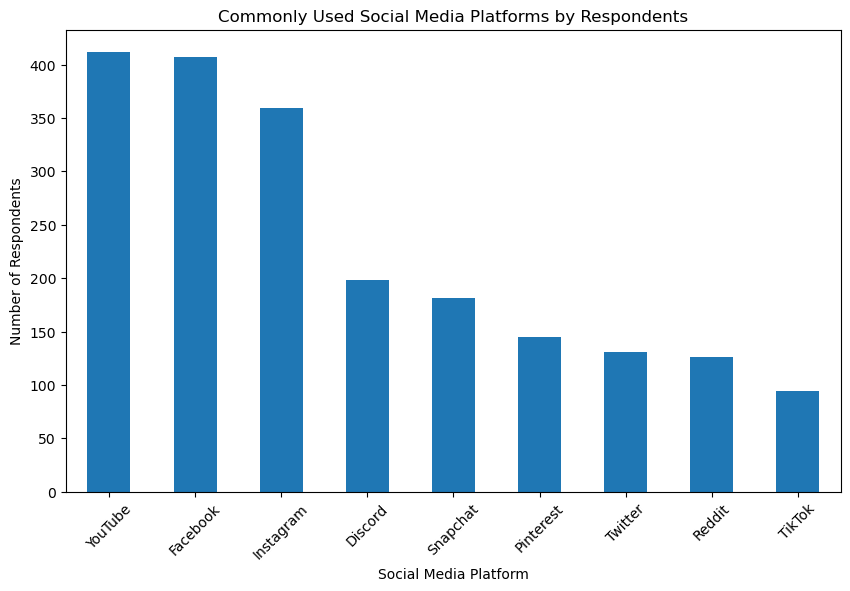

In [12]:
social_media_platforms = df['7. What social media platforms do you commonly use?'].str.split(', ', expand=True).stack().value_counts()

plt.figure(figsize=(10, 6))
social_media_platforms.plot(kind='bar')
plt.title('Commonly Used Social Media Platforms by Respondents')
plt.xlabel('Social Media Platform')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

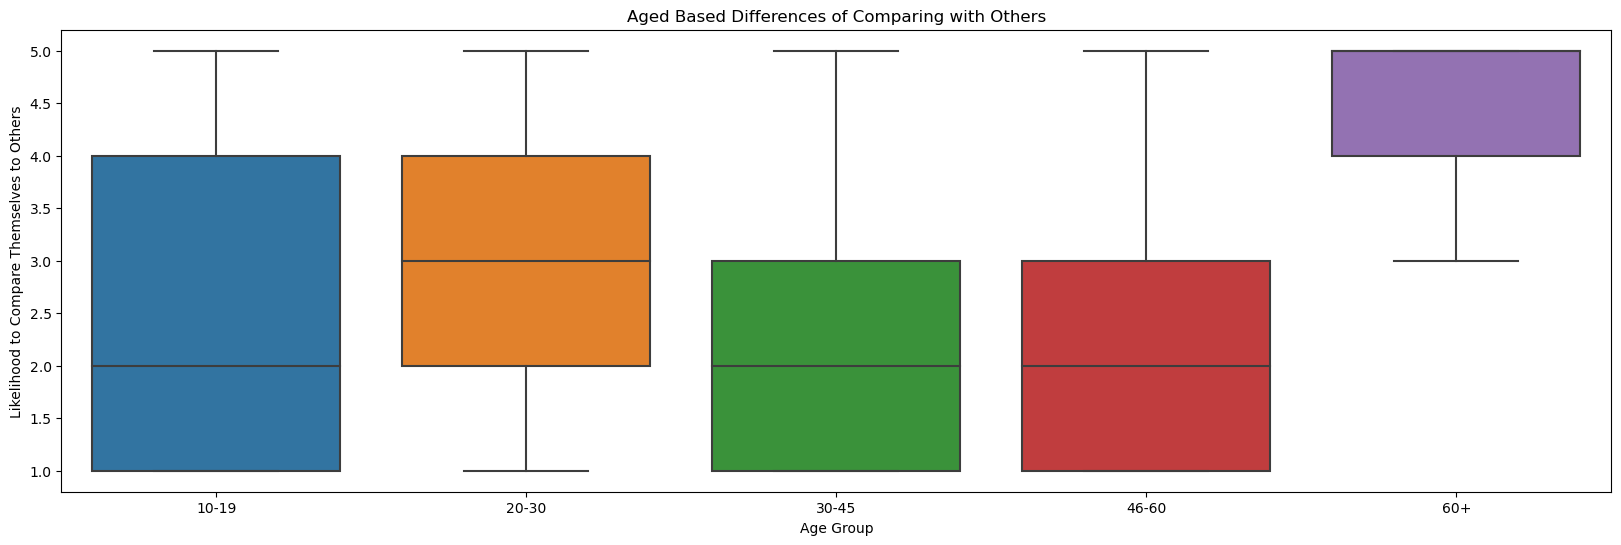

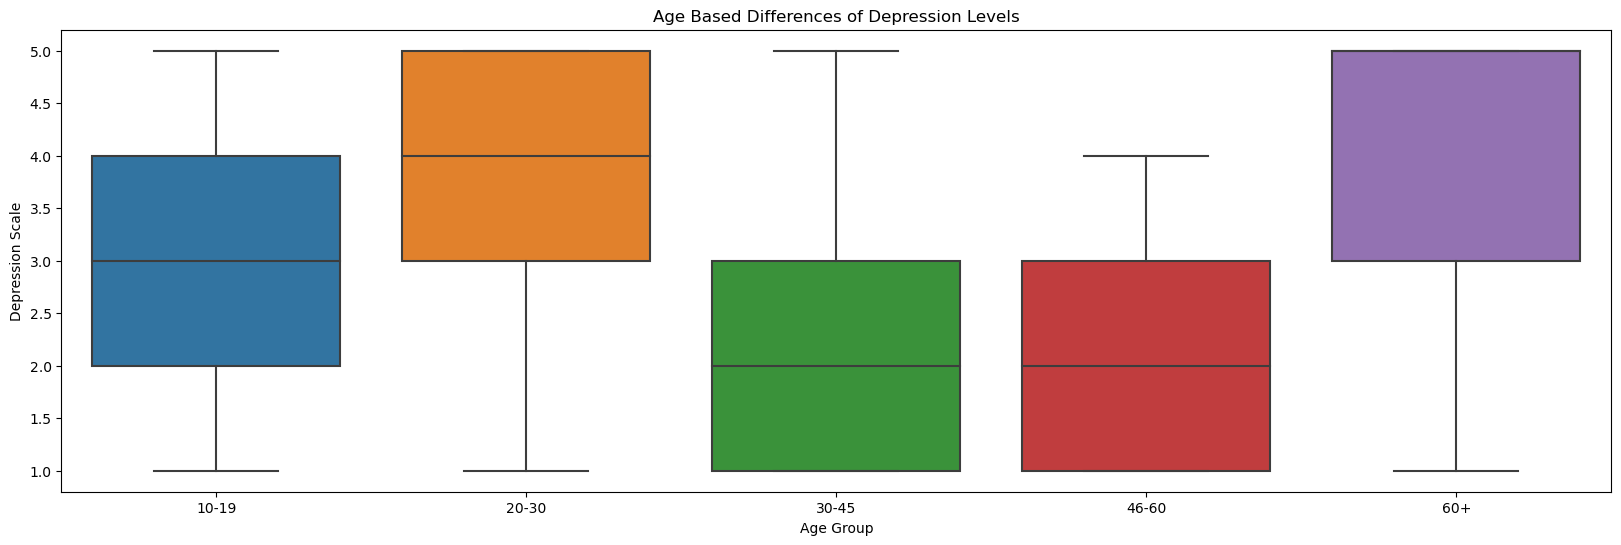

In [13]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Age_Group', y='15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?', data=df)
plt.title('Aged Based Differences of Comparing with Others')
plt.xlabel('Age Group')
plt.ylabel('Likelihood to Compare Themselves to Others')
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(x='Age_Group', y='18. How often do you feel depressed or down?', data=df)
plt.title('Age Based Differences of Depression Levels')
plt.xlabel('Age Group')
plt.ylabel('Depression Scale')
plt.show()

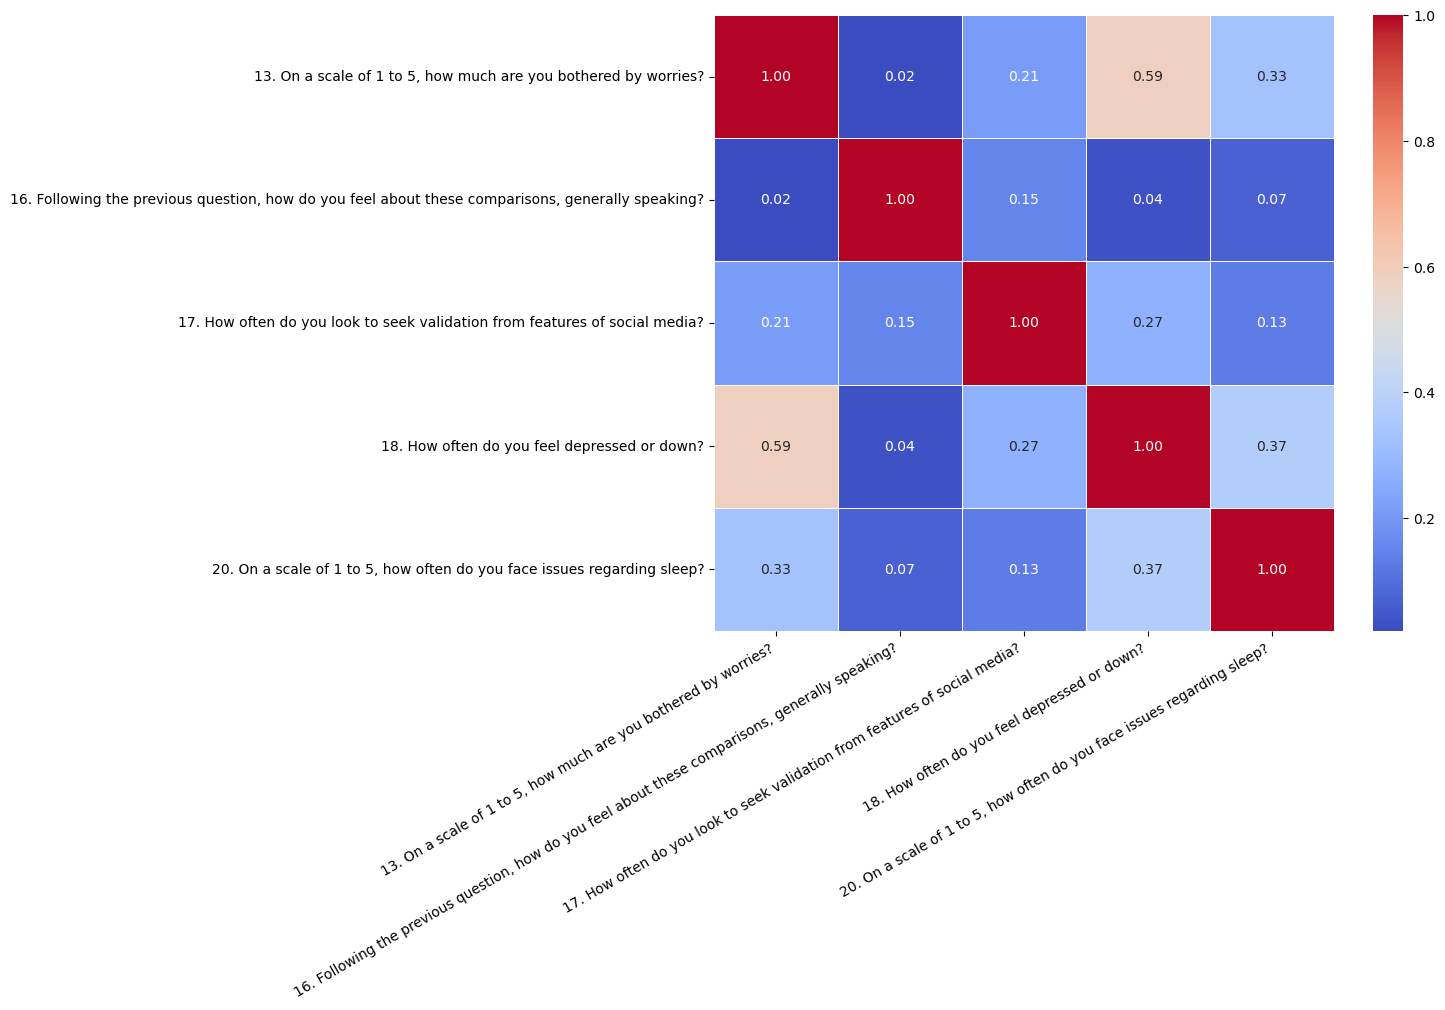

In [14]:
depression_indicators = df[df.columns[[10,13,14,15,17]]]

corr_matrix = depression_indicators.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.xticks(rotation=30, ha="right")
plt.show()

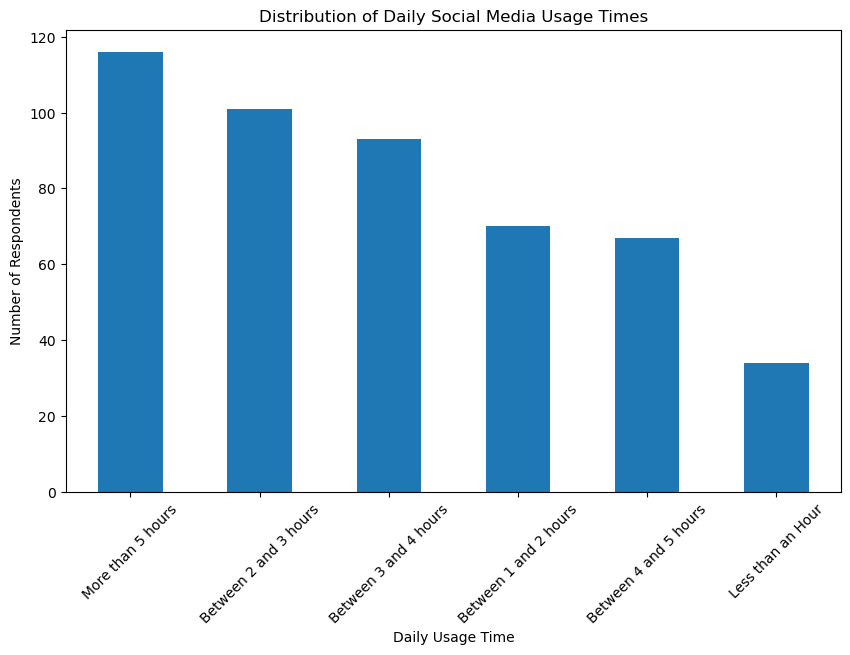

In [15]:
daily_usage_distribution = df['8. What is the average time you spend on social media every day?'].value_counts()

plt.figure(figsize=(10, 6))
daily_usage_distribution.plot(kind='bar')
plt.title('Distribution of Daily Social Media Usage Times')
plt.xlabel('Daily Usage Time')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column                                                                                                                Non-Null Count  Dtype   
---  ------                                                                                                                --------------  -----   
 0   2. Gender                                                                                                             481 non-null    object  
 1   3. Relationship Status                                                                                                481 non-null    object  
 2   4. Occupation Status                                                                                                  481 non-null    object  
 3   6. Do you use social media?                                                                                           481 non-null    object  
 4   7.

### Main Metrics
- 13. On a scale of 1 to 5, how much are you bothered by worries
- 20. On a scale of 1 to 5, how often do you face issues regarding sleep?
- 15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?
- 17. How often do you look to seek validation from features of social media?'
- 18. How often do you feel depressed or down?

### Reformatting data to prepare for training

In [17]:
# create columns that identify what social media platforms are used and not used

# Split the '7. What social media platforms do you commonly use?' column into a list of platforms
df['Social Media Platforms'] = df['7. What social media platforms do you commonly use?'].str.split(', ')

# Get the unique set of all social media platforms
all_platforms = set(platform for platforms_list in df['Social Media Platforms'] for platform in platforms_list)

# Create binary columns for each social media platform
for platform in all_platforms:
    df[platform] = df['Social Media Platforms'].apply(lambda x: platform in x)

# Drop the temporary 'Social Media Platforms' column
df = df.drop('Social Media Platforms', axis=1)

In [18]:
# Create a binary column indicating whether a person needs professional help
df['Needs_Professional_Help'] = (
    (df['13. On a scale of 1 to 5, how much are you bothered by worries?'] >= 4) |
    (df['20. On a scale of 1 to 5, how often do you face issues regarding sleep?'] >= 4) |
    (df['15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?'] >= 4) |
    (df['17. How often do you look to seek validation from features of social media?'] >= 4) |
    (df['18. How often do you feel depressed or down?'] >= 4)
).astype(int)

# Display the new column
print(df['Needs_Professional_Help'].value_counts())

Needs_Professional_Help
1    394
0     87
Name: count, dtype: int64


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 29 columns):
 #   Column                                                                                                                Non-Null Count  Dtype   
---  ------                                                                                                                --------------  -----   
 0   2. Gender                                                                                                             481 non-null    object  
 1   3. Relationship Status                                                                                                481 non-null    object  
 2   4. Occupation Status                                                                                                  481 non-null    object  
 3   6. Do you use social media?                                                                                           481 non-null    object  
 4   7.

In [20]:
int_columns = df.iloc[:, :-1].select_dtypes(include='int').columns

# Convert integer columns to object data type
df[int_columns] = df[int_columns].astype(str)

# Display the resulting DataFrame
print(df.dtypes)

2. Gender                                                                                                                 object
3. Relationship Status                                                                                                    object
4. Occupation Status                                                                                                      object
6. Do you use social media?                                                                                               object
7. What social media platforms do you commonly use?                                                                       object
8. What is the average time you spend on social media every day?                                                          object
9. How often do you find yourself using Social media without a specific purpose?                                          object
10. How often do you get distracted by Social media when you are busy doing something?           

In [21]:
df_2 = pd.get_dummies(df)

In [22]:
df_2.head()

,Pinterest,TikTok,Facebook,Reddit,YouTube,Snapchat,Discord,Twitter,Instagram,Needs_Professional_Help,...,"20. On a scale of 1 to 5, how often do you face issues regarding sleep?_1","20. On a scale of 1 to 5, how often do you face issues regarding sleep?_2","20. On a scale of 1 to 5, how often do you face issues regarding sleep?_3","20. On a scale of 1 to 5, how often do you face issues regarding sleep?_4","20. On a scale of 1 to 5, how often do you face issues regarding sleep?_5",Age_Group_10-19,Age_Group_20-30,Age_Group_30-45,Age_Group_46-60,Age_Group_60+
0,False,False,True,True,True,False,True,True,True,1,...,False,False,False,False,True,False,True,False,False,False
1,False,False,True,True,True,False,True,True,True,1,...,False,False,False,False,True,False,True,False,False,False
2,True,False,True,False,True,False,False,False,True,1,...,False,False,False,False,True,False,True,False,False,False
3,False,False,True,False,False,False,False,False,True,1,...,False,True,False,False,False,False,True,False,False,False
4,False,False,True,False,True,False,False,False,True,1,...,True,False,False,False,False,False,True,False,False,False


In [23]:
df_2 = df_2.astype(int)

In [24]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Columns: 225 entries, Pinterest to Age_Group_60+
dtypes: int64(225)
memory usage: 845.6 KB


### Build and Train Model

In [63]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.base import clone 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import math

In [65]:
X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [66]:
base_classifier = DecisionTreeClassifier()

clf = AdaBoostClassifier(base_classifier, n_estimators=50, learning_rate=1.0)

In [67]:
clf.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier())

In [69]:
predicitons = clf.predict(x_test)

In [70]:
accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy}")

Accuracy: 0.7793103448275862


In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]}

grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)
print("Best Accuracy: ", grid_search.best_score_)

Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 150}
Best Accuracy:  0.8541666666666666


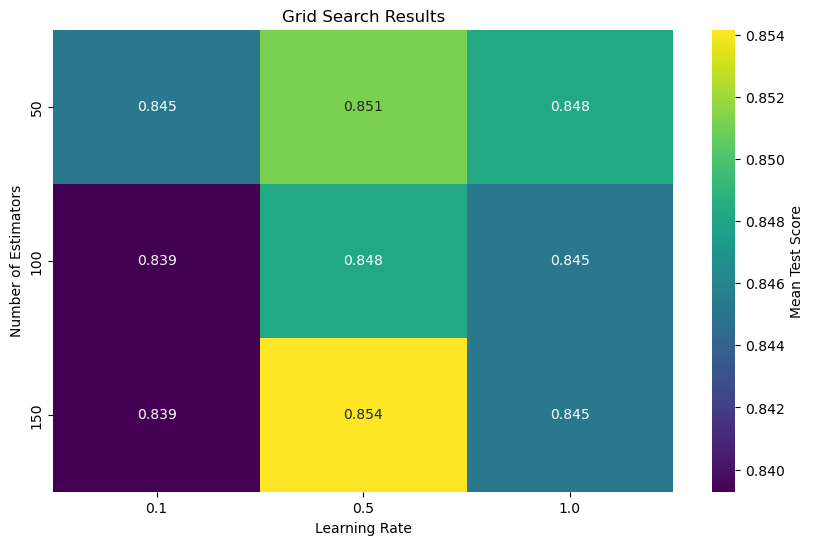

In [73]:
results = pd.DataFrame(grid_search.cv_results_)

heatmap_data = results.pivot(index='param_n_estimators', columns='param_learning_rate', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title('Grid Search Results')
plt.xlabel('Learning Rate')
plt.ylabel('Number of Estimators')
plt.show()